# Polynomial regression

In [27]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Why Polynomial Regression?

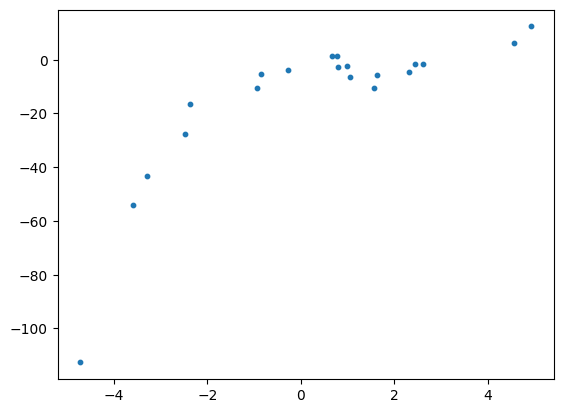

In [28]:
# To understand the need for polynomial regression, let’s generate some random dataset first.
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
x = np.sort(x)

y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

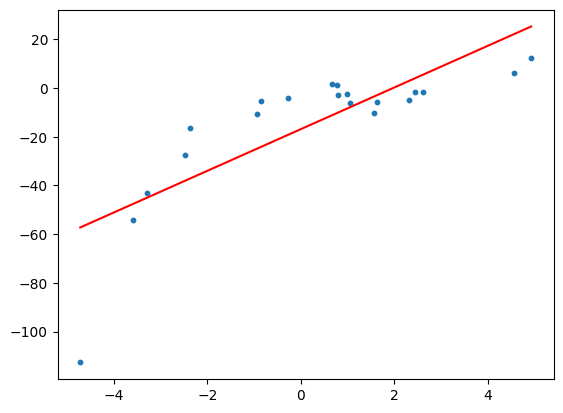

In [29]:
# Let’s apply a linear regression model to this dataset.
from sklearn.linear_model import LinearRegression

# transforming the data to include another axis
x = x.reshape((-1, 1))
y = y.reshape((-1, 1))

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [30]:
print(f"Funkcija premice: \t y = {model.coef_[0][0]} x + {model.intercept_[0]}")

Funkcija premice: 	 y = 8.545713894743695 x + -16.870421008663147


## What is Polynomial Regression?

y = k*x + n

Splošna enačba polinoma je: 
$$y = w_1 x + w_2 x^2 + w_3 x^3 + ... + w_{n-1} x^{n-1} + b$$
Tukaj lahko spreminjamo **stopnjo polinoma**, koeficiente `w` in `b`.

**Stopnja polinoma** nam pove koliko je **najvišja potenca** na katero dajemo naš `x`. Z višanje stopnje polinoma višamo kompleksnost modela.

In [31]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([0, 1, 2, 3, 4])
X = X.reshape((-1, 1))

poly_features = PolynomialFeatures(degree=2)
X_POLY = poly_features.fit_transform(X)

X_POLY

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

---

In [32]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2, include_bias=False)
x_poly = polynomial_features.fit_transform(x)

In [33]:
# the default "include_bias=True" adds a feature that's constantly 1
x_poly[:4]

array([[-4.7226796 , 22.30370258],
       [-3.60267397, 12.97925974],
       [-3.29215704, 10.83829796],
       [-2.48223722,  6.16150161]])

---

In [34]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

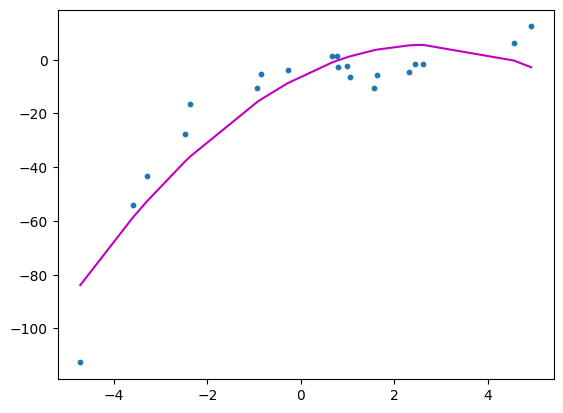

In [35]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [36]:
print(f"Funkcija premice: \t y = {model.coef_[0][0]} x + {model.coef_[0][1]} x^2 + {model.intercept_[0]}")

Funkcija premice: 	 y = 8.739018865182908 x + -1.6350080437559318 x^2 + -6.151248449768085


---

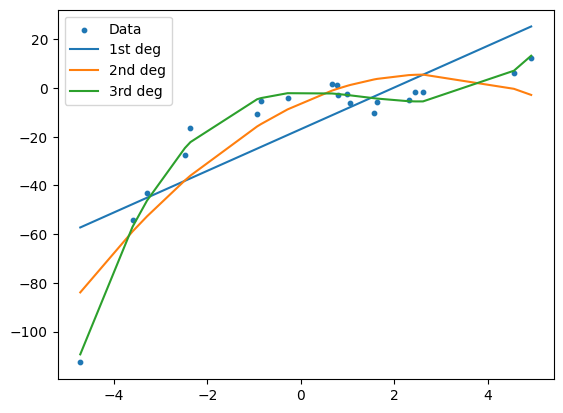

In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly1_features = PolynomialFeatures(degree=1, include_bias=False)
x_poly1 = poly1_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly1, y)
y_poly1_pred = model.predict(x_poly1)

poly2_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly2 = poly2_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly2, y)
y_poly2_pred = model.predict(x_poly2)

poly3_features = PolynomialFeatures(degree=3, include_bias=False)
x_poly3 = poly3_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly3, y)
y_poly3_pred = model.predict(x_poly3)


plt.scatter(x, y, s=10, label="Data")
plt.plot(x, y_poly1_pred, label="1st deg")
plt.plot(x, y_poly2_pred, label="2nd deg")
plt.plot(x, y_poly3_pred, label="3rd deg")

plt.legend()
plt.show()

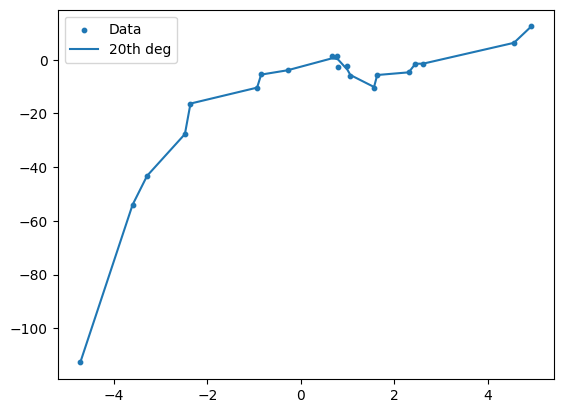

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=20, include_bias=False)
x_poly = poly_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

plt.scatter(x, y, s=10, label="Data")
plt.plot(x, y_poly_pred, label="20th deg")

plt.legend()
plt.show()

----

## Polynomial Regression with Multiple Features

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
np.random.seed(1)
x_1 = np.absolute(np.random.randn(100, 1) * 10)
x_2 = np.absolute(np.random.randn(100, 1) * 30)
y = 2*x_1**2 + 3*x_2 + 2 + np.random.randn(100, 1)*20

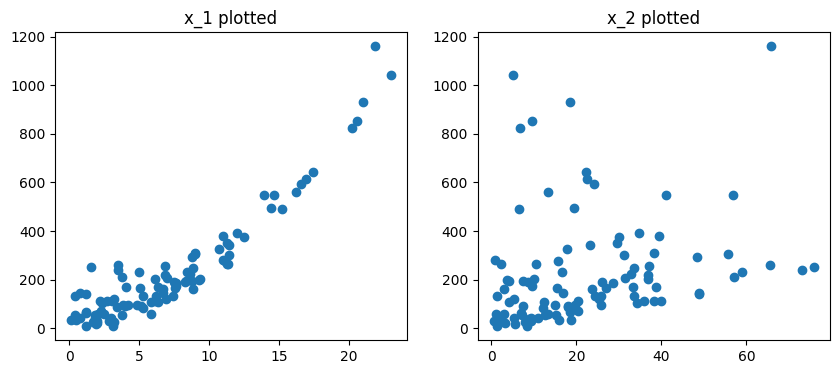

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(x_1, y)
axes[1].scatter(x_2, y)
axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()

In [42]:
df = pd.DataFrame({"x_1":x_1.reshape(100,), "x_2":x_2.reshape(100,), "y":y.reshape(100,)}, index=range(0,100))
df

,x_1,x_2,y
0,16.243454,13.413857,561.923579
1,6.117564,36.735231,203.534988
2,5.281718,12.104749,82.861219
3,10.729686,17.807356,324.771961
4,8.654076,32.847355,223.689106
...,...,...,...
95,0.773401,48.823150,143.718510
96,3.438537,18.069578,88.201845
97,0.435969,12.608466,55.900949
98,6.200008,24.328550,132.757355


 $\Large y = w_1 x_1 + w_2 x_2 + w_3 x_1^2 + w_4 x_2^2 + w_5 x_1 x_2 + b$

In [43]:
X, y = df[["x_1", "x_2"]], df["y"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

pd.DataFrame(poly_features, columns=[r"$x_1$", r"$x_2$", r"$x_1^2$", r"$x_1 x_2$", r"$x_2^2$"])

,$x_1$,$x_2$,$x_1^2$,$x_1 x_2$,$x_2^2$
0,16.243454,13.413857,263.849786,217.887363,179.931558
1,6.117564,36.735231,37.424591,224.730133,1349.477207
2,5.281718,12.104749,27.896540,63.933866,146.524954
3,10.729686,17.807356,115.126166,191.067339,317.101917
4,8.654076,32.847355,74.893036,284.263519,1078.948755
...,...,...,...,...,...
95,0.773401,48.823150,0.598149,37.759858,2383.699997
96,3.438537,18.069578,11.823535,62.132910,326.509664
97,0.435969,12.608466,0.190069,5.496895,158.973418
98,6.200008,24.328550,38.440105,150.837216,591.878354


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [46]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)

In [49]:
poly_reg_y_predicted

array([145.72381131, 225.76917402, 466.96591793, 103.80051687,
        48.77859004, 126.20203282, 273.34728664, 118.6707899 ,
       542.55240214, 557.78324219,  94.1278756 , 120.80778896,
       181.69146017, 193.07613292, 385.55902084, 244.50491225,
       133.56214539, 168.38378408,  94.52513116,  86.91097432,
        89.34275735,  34.94676793, 143.46232397, 187.53120857,
       560.57877439, 355.16135962,  33.64333707,  78.82645348,
        29.4133473 , 242.48638268])

In [52]:
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

20.93770783907871

---

## Bostom Hausing

```
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
```

Napovedovali bomo **MEDV**.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [56]:
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_poly.shape: {X_train_poly.shape}")

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [58]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test_poly)

In [59]:
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

5.662961691693015

---

In [61]:
poly = PolynomialFeatures(degree=3).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_poly.shape: {X_train_poly.shape}")

X_train.shape: (379, 13)
X_train_poly.shape: (379, 560)


In [62]:
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)
model2_pred = model2.predict(X_test_poly)

In [63]:
rmse_2 = np.sqrt(mean_squared_error(y_test, model2_pred))
rmse_2

140.55904217867763

## Disadvantages of polynomial regression

Hitro overfitajo.

Čez palec gledano, vzememo polinome stopnje 2 ali 3.